In [34]:
# @title Setup
from google.cloud import bigquery
from google.colab import data_table
import bigframes.pandas as bpd

project = 'postechanalyticsfase3' # Project ID inserted based on the query results selected to explore
location = 'southamerica-east1' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()

## Reference SQL syntax from the original job
Use the ```jobs.query```
[method](https://cloud.google.com/bigquery/docs/reference/rest/v2/jobs/query) to
return the SQL syntax from the job. This can be copied from the output cell
below to edit the query now or in the future. Alternatively, you can use
[this link](https://console.cloud.google.com/bigquery?j=postechanalyticsfase3:southamerica-east1:bquxjob_4caafdbb_195abe735a1)
back to BigQuery to edit the query within the BigQuery user interface.

In [35]:
# Running this code will display the query used to generate your previous job

job = client.get_job('bquxjob_4caafdbb_195abe735a1') # Job ID inserted based on the query results selected to explore
print(job.query)

SELECT '112020' as MesAno
        ,COUNT(CASE B005 WHEN 1 THEN 1 ELSE null END) Internado
        ,COUNT(CASE WHEN B005 in (2,3) THEN 2 ELSE null END) NaoInternado
        ,COUNT(CASE WHEN NULLIF(B005,9) is not null THEN 1 ELSE null END) TotalPreenchido
        ,COUNT(*) Total
        ,(COUNT(CASE WHEN NULLIF(B005,9) is not null THEN 1 ELSE null END)/COUNT(*)) *100 as PercentualPreenchimento
FROM `PNAD_COVID.PNAD_COVID_112020` 
UNION ALL
SELECT '102020' as MesAno
        ,COUNT(CASE B005 WHEN 1 THEN 1 ELSE null END) Internado
        ,COUNT(CASE WHEN B005 in (2,3) THEN 2 ELSE null END) NaoInternado
       ,COUNT(CASE WHEN NULLIF(B005,9) is not null THEN 1 ELSE null END) TotalPreenchido
       ,COUNT(*) Total
        ,(COUNT(CASE WHEN NULLIF(B005,9) is not null THEN 1 ELSE null END)/COUNT(*)) *100 as PercentualPreenchimento
FROM `PNAD_COVID.PNAD_COVID_102020` 
UNION ALL
SELECT '092020' as MesAno
        ,COUNT(CASE B005 WHEN 1 THEN 1 ELSE null END) Internado
        ,COUNT(CASE WHEN B00

# Result set loaded from BigQuery job as a DataFrame
Query results are referenced from the Job ID ran from BigQuery and the query
does not need to be re-run to explore results. The ```to_dataframe```
[method](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.job.QueryJob.html#google.cloud.bigquery.job.QueryJob.to_dataframe)
downloads the results to a Pandas DataFrame by using the BigQuery Storage API. The read_gbq_table [method](https://cloud.google.com/python/docs/reference/bigframes/latest/bigframes.pandas#bigframes_pandas_read_gbq_function) turns a BigQuery table into the BigFrames DataFrame.

To edit query syntax, you can do so from the BigQuery SQL editor or in the
```Optional:``` sections below.

In [36]:
# Running this code will read results from your previous job

job = client.get_job('bquxjob_4caafdbb_195abe735a1') # Job ID inserted based on the query results selected to explore
destination = job.destination

# Load data from a BigQuery table using BigFrames DataFrames:
bq_df = bpd.read_gbq(f"{destination.project}.{destination.dataset_id}.{destination.table_id}")
bq_df = bq_df.sort_values(by='MesAno')
bq_df

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: UserWarning: Reading cached table from 2025-03-20 00:48:59.552435+00:00 to avoid incompatibilies with previous reads of this table. To read the latest version, set `use_cache=False` or close the current session with Session.close() or bigframes.pandas.close_session().
  exec(code_obj, self.user_global_ns, self.user_ns)


,MesAno,Internado,NaoInternado,TotalPreenchido,Total,PercentualPreenchimento
3,052020,200,1581,1781,349306,0.509868
0,062020,227,1503,1730,381270,0.453747
2,072020,265,2523,2788,384166,0.725728
5,082020,253,2270,2523,386520,0.652748
6,092020,199,1680,1879,387298,0.485156
4,102020,182,1670,1852,380461,0.486778
1,112020,198,1898,2096,381438,0.5495


## Show descriptive statistics using describe()
Use the ```DataFrame.describe()```
[method](https://cloud.google.com/python/docs/reference/bigframes/latest/bigframes.dataframe.DataFrame#bigframes_dataframe_DataFrame_describe)
to generate descriptive statistics. Descriptive statistics include those that
summarize the central tendency, dispersion and shape of a dataset’s
distribution, excluding ```NaN``` values. You may also use other Python methods
to interact with your data.

In [37]:
# Generate descriptive statistics.
bq_df.describe()

,Internado,NaoInternado,TotalPreenchido,Total,PercentualPreenchimento
count,7.0,7.0,7.0,7.0,7.0
mean,217.714286,1875.0,2092.714286,378637.0,0.551932
std,31.345995,383.259703,408.436741,13204.401274,0.100406
min,182.0,1503.0,1730.0,349306.0,0.453747
25%,198.0,1581.0,1781.0,380461.0,0.485156
50%,200.0,1680.0,1879.0,381438.0,0.509868
75%,253.0,2270.0,2523.0,386520.0,0.652748
max,265.0,2523.0,2788.0,387298.0,0.725728


In [38]:
# Convert BigQuery DataFrame to pandas DataFrame.
pandas_df = bq_df.to_pandas()


<Figure size 1200x600 with 0 Axes>

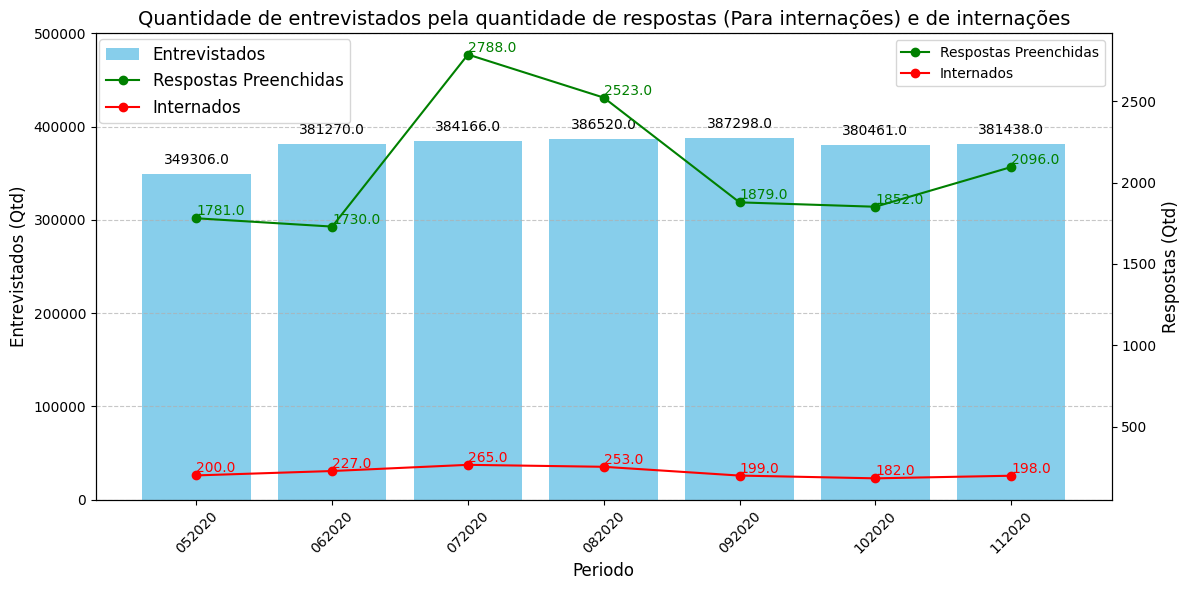

In [39]:
import matplotlib.pyplot as plt

# Configurar o tamanho do gráfico
plt.figure(figsize=(12, 6))

# Criar o gráfico de barras para a coluna "total" no eixo principal
fig, ax1 = plt.subplots(figsize=(12, 6))  # Define o eixo principal
barras1 = ax1.bar(bq_df['MesAno'], bq_df['Total'], color='skyblue', label='Entrevistados')
ax1.set_xlabel('Periodo', fontsize=12)
ax1.set_ylim(0,500000)
ax1.set_ylabel('Entrevistados (Qtd)', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.bar_label(barras1, fmt='%.1f', padding=5, fontsize=10, color='black')


# Criar o eixo secundário para as linhas
ax2 = ax1.twinx()  # Define o eixo secundário
linha1, = ax2.plot(bq_df['MesAno'], bq_df['TotalPreenchido'], color='green', marker='o', label='Respostas Preenchidas')
for x, y in zip(bq_df['MesAno'], bq_df['TotalPreenchido']):
    ax2.text(x, y, f'{y:.1f}', ha='left', va='bottom', fontsize=10, color='green')
linha2, = ax2.plot(bq_df['MesAno'], bq_df['Internado'], color='red', marker='o', label='Internados')
for x, y in zip(bq_df['MesAno'], bq_df['Internado']):
    ax2.text(x, y, f'{y:.1f}', ha='left', va='bottom', fontsize=10, color='red')
ax2.set_ylabel('Respostas (Qtd)', fontsize=12)
ax2.legend()


# Adicionar título e legenda
plt.title('Quantidade de entrevistados pela quantidade de respostas (Para internações) e de internações', fontsize=14)
fig.legend(loc='upper left', bbox_to_anchor=(0.08, 0.94), fontsize=12)  # Configuração para mostrar a legenda geral

# Mostrar o gráfico
plt.tight_layout()
plt.show()